# SnowFlake vs Data Artefacts Tracebility excel sheet
## Mapping table names

- Data Artefacts Tracebility: https://bayergroup.sharepoint.com/:x:/r/sites/CDPPlatformDataProductsoperationstransition/Shared%20Documents/Governance/Planning%20Materials/Data%20Products%20development/Data%20Artefacts%20Tracebility.xlsx?d=w7fe7a1836c974cdda84bafbc69cbf4ac&csf=1&web=1&e=U0asFE

- ShowFlake: tbd

In [73]:
import pandas as pd
import os

In [74]:
os.getcwd()

'/Users/Konstantin_Kuts/PyCharmMiscProject'

## loading data

In [2]:
data_art_trace = pd.read_csv('Data Artefacts Tracebility(Data Product Artefacts).csv', encoding='utf-8')

In [3]:
sfdata_enrich = pd.read_csv('Tables_only_ENRICH_SCHEMA.txt', header=None, names=['TABLE_NAME'])
sfdata_model = pd.read_csv('Tables_only_MODEL_SCHEMA.txt', header=None, names=['TABLE_NAME'])
sfdata_analytics = pd.read_csv('Tables_only_ANALYTICS_SCHEMA.txt', header=None, names=['TABLE_NAME'])

In [4]:
sfdata_analytics.head(2)

TABLE_NAME
0      2_SALES_OBJECTIVE__MAPEO
1  2_SALES_OBJECTIVE__OBJETIVOS

## source 'Data Artefacts Tracebility'

In [5]:
data_art_trace.head(2)

Country Vendor Source              Data Domain Subject Area  \
0      BE  IQVIA  IQVIA  Master & Reference Data  Master Data   
1      BE  IQVIA  IQVIA  Master & Reference Data  Master Data   

            Product Name Enrich Layer        Modelled layer Analytics Layer  \
0  Master Reference Data      AC_CATG  S_IQVIA_HDSC_AC_CATG     REF_AC_CATG   
1               Customer       AC_TYP   S_IQVIA_HDSC_AC_TYP      REF_AC_TYP   

   Updated/Released on: GitHub repository(-ies) enrich layer sttm model sttm  \
0                   NaN                                                        
1                   NaN                                                        

  analytics sttm  Confluence Link(s) for other Docs. Owner/Key SME  \
0            NaN                                 NaN           NaN   
1            NaN                                 NaN           NaN   

  Decomissionning Status  Retention needs  
0                    NaN              NaN  
1                    NaN              NaN

In [6]:
print(data_art_trace.columns)

Index(['Country', 'Vendor', 'Source', 'Data Domain', 'Subject Area',
       'Product Name', 'Enrich Layer', 'Modelled layer', 'Analytics Layer',
       'Updated/Released on:', 'GitHub repository(-ies)', 'enrich layer sttm',
       'model sttm', 'analytics sttm', 'Confluence Link(s) for other Docs.',
       'Owner/Key SME', 'Decomissionning Status', 'Retention needs'],
      dtype='object')


In [7]:
data_art_trace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             3795 non-null   object 
 1   Vendor                              3798 non-null   object 
 2   Source                              3798 non-null   object 
 3   Data Domain                         3797 non-null   object 
 4   Subject Area                        3798 non-null   object 
 5   Product Name                        3798 non-null   object 
 6   Enrich Layer                        3798 non-null   object 
 7   Modelled layer                      3797 non-null   object 
 8   Analytics Layer                     3797 non-null   object 
 9   Updated/Released on:                3 non-null      float64
 10  GitHub repository(-ies)             3798 non-null   object 
 11  enrich layer sttm                   3798 no

In [8]:
columns=['Source', 'Product Name', 'Enrich Layer', 'Modelled layer', 'Analytics Layer']
data_art_trace = data_art_trace[columns]

In [9]:
data_art_trace.head(5)

Source           Product Name Enrich Layer        Modelled layer  \
0  IQVIA  Master Reference Data      AC_CATG  S_IQVIA_HDSC_AC_CATG   
1  IQVIA               Customer       AC_TYP   S_IQVIA_HDSC_AC_TYP   
2  IQVIA                Product          ATC      S_IQVIA_HDSC_ATC   
3  IQVIA  Territory & Alignment        BNDRY    S_IQVIA_HDSC_BNDRY   
4  IQVIA  Master Reference Data           DS       S_IQVIA_HDSC_DS   

  Analytics Layer  
0     REF_AC_CATG  
1      REF_AC_TYP  
2         DIM_ATC  
3       DIM_BNDRY  
4          DIM_DS

In [10]:
dat_enrich, dat_model, dat_analytics = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

In [11]:
dat_enrich['TABLE_NAME'] = data_art_trace[['Enrich Layer']]
dat_model['TABLE_NAME'] = data_art_trace[['Modelled layer']]
dat_analytics['TABLE_NAME'] = data_art_trace[['Analytics Layer']]

In [12]:
dat_enrich.head(2)

TABLE_NAME
0    AC_CATG
1     AC_TYP

#### Preparing

In [13]:
len(dat_enrich)

3798

In [14]:
dat_enrich_upcase = dat_enrich.apply(lambda x: x.str.strip()).replace('-', pd.NA).drop_duplicates().dropna()

In [15]:
dat_enrich = dat_enrich.apply(lambda x: x.str.strip().str.lower()).replace('-', pd.NA).drop_duplicates().dropna()

In [16]:
dat_enrich.head(2)

TABLE_NAME
0    ac_catg
1     ac_typ

In [17]:
len(dat_enrich)

825

In [18]:
len(dat_model)

3798

In [19]:
dat_model_upcase = dat_model.apply(lambda x: x.str.strip()).replace('-', pd.NA).drop_duplicates().dropna()

In [20]:
dat_model = dat_model.apply(lambda x: x.str.strip().str.lower()).replace('-', pd.NA).drop_duplicates().dropna()

In [21]:
len(dat_model)

806

In [22]:
dat_model.head(2)

TABLE_NAME
0  s_iqvia_hdsc_ac_catg
1   s_iqvia_hdsc_ac_typ

In [23]:
len(dat_analytics)

3798

In [24]:
dat_analytics_upcase = dat_analytics.apply(lambda x: x.str.strip()).replace('-', pd.NA).drop_duplicates().dropna()

In [25]:
dat_analytics = dat_analytics.apply(lambda x: x.str.strip().str.lower()).replace('-', pd.NA).drop_duplicates().dropna()

In [26]:
len(dat_analytics)

669

In [27]:
dat_analytics.head(2)

TABLE_NAME
0  ref_ac_catg
1   ref_ac_typ

## Snowflake tables

- sfdata_enrich
- sfdata_model
- sfdata_analytics

#### preparing

In [28]:
sfdata_enrich.head(2)

TABLE_NAME
0     BLINKRX_DAILY
1  BLINKRX_DISPENSE

In [29]:
len(sfdata_enrich)

1903

In [30]:
sfdata_enrich_upcase = sfdata_enrich.apply(lambda x: x.str.strip()).replace('-', pd.NA).drop_duplicates().dropna()

In [31]:
sfdata_enrich = sfdata_enrich.apply(lambda x: x.str.strip().str.lower()).replace('-', pd.NA).drop_duplicates().dropna()

In [32]:
sfdata_enrich.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TABLE_NAME  1903 non-null   object
dtypes: object(1)
memory usage: 15.0+ KB


In [33]:
sfdata_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TABLE_NAME  1042 non-null   object
dtypes: object(1)
memory usage: 8.3+ KB


In [34]:
sfdata_model_upcase = sfdata_model.apply(lambda x: x.str.strip()).replace('-', pd.NA).drop_duplicates().dropna()

In [35]:
sfdata_model = sfdata_model.apply(lambda x: x.str.strip().str.lower()).replace('-', pd.NA).drop_duplicates().dropna()

In [36]:
len(sfdata_model)

1042

In [37]:
len(sfdata_analytics)

1627

In [38]:
sfdata_analytics_upcase = sfdata_analytics.apply(lambda x: x.str.strip()).replace('-', pd.NA).drop_duplicates().dropna()

In [39]:
sfdata_analytics = sfdata_analytics.apply(lambda x: x.str.strip().str.lower()).replace('-', pd.NA).drop_duplicates().dropna()

In [40]:
len(sfdata_analytics)

1627

# Enrich layer mapping

In [41]:
print(f'Snowflake: {len(sfdata_enrich)}')

Snowflake: 1903


In [42]:
sfdata_enrich.head()

TABLE_NAME
0                                      blinkrx_daily
1                                   blinkrx_dispense
2                                     blinkrx_status
3                                      bv_adhoc_byom
4  bv_adhoc_dismissalmapping_dismissal_mapping_pa...

In [43]:
print(f'Excel sheet: {len(dat_enrich)}')

Excel sheet: 825


In [44]:
dat_enrich.head()

TABLE_NAME
0    ac_catg
1     ac_typ
2        atc
3      bndry
4         ds

In [45]:
set1 = set(sfdata_enrich['TABLE_NAME'])
set2 = set(dat_enrich['TABLE_NAME'])

### Sets approach

In [46]:
# Tables in table1 but not in table2
only_in_SnowFlake = set1 - set2

# Tables in table2 but not in table1
only_in_Excel = set2 - set1

In [47]:
len(only_in_SnowFlake)

1876

In [48]:
# print("Only in Table 1:", only_in_SnowFlake)

In [49]:
len(only_in_Excel)

798

In [50]:
# print("Only in Table 2:", only_in_Excel)

In [51]:
common = set1 & set2
common

{'bv_google_analytics_ga',
 'bv_google_analytics_ga_hits',
 'sap_elsa_fact_copa_md_bus_respo',
 'sap_elsa_fact_copa_td',
 'sap_elsa_fact_meta_keyfigure_base_definition',
 'sap_elsa_fact_meta_keyfigure_restrictions',
 'sap_elsa_h2r_auth_details',
 'sap_elsa_md_cu_cust_ph_cdp',
 'sap_elsa_md_cu_cust_sls_h2r',
 'sap_elsa_md_ds_cmpny_cd_h2r',
 'sap_elsa_md_ds_cntry_h2r',
 'sap_elsa_md_ds_crncy_convn_h2r',
 'sap_elsa_md_ds_ctrlng_area_h2r',
 'sap_elsa_md_ds_distrbn_chnl_h2r',
 'sap_elsa_md_ds_dt_tm_dim',
 'sap_elsa_md_ds_rgnl_hrchy_ph_h2r',
 'sap_elsa_md_ds_sls_org_h2r',
 'sap_elsa_md_fact_itm_h2r',
 'sap_elsa_md_fact_prft_centr_glbl_h2r',
 'sap_elsa_md_fact_val_typ_h2r',
 'sap_elsa_md_ma_centrl_uom_mat_h2r',
 'sap_elsa_md_ma_mat_h2r',
 'sap_elsa_md_ma_uom_mat_h2r',
 'sap_elsa_o2c_sd_billng_doc_h2r',
 'sap_elsa_o2c_sd_dlvry_h2r',
 'sap_elsa_o2c_sd_ord_h2r',
 'sap_elsa_scl_mm_all_mch1_ph_cdp_intfc'}

In [52]:
len(set1 & set2 )

27

#### Merge approach

In [53]:
inner_enrich = sfdata_enrich.merge(dat_enrich, how = 'inner' )

In [54]:
len(inner_enrich)

27

examples of mistmatch in names btw Snowflake and Excel file

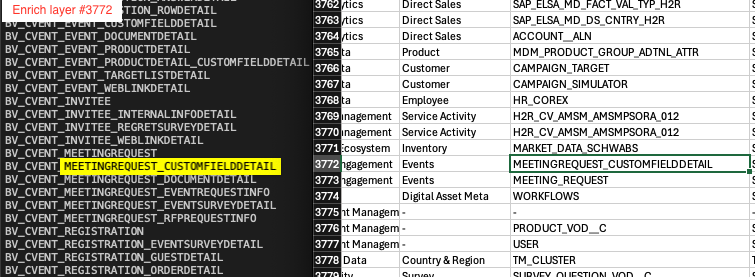

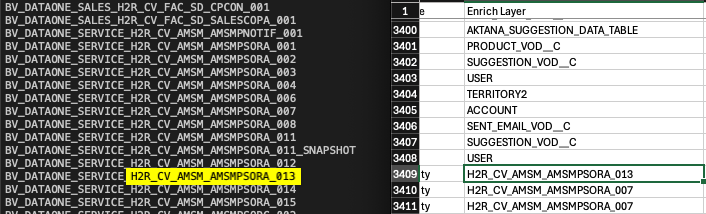

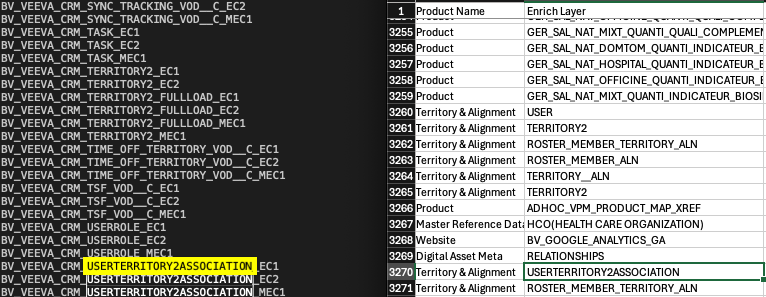

# Model layer

In [55]:
print(f'Snowflake: {len(sfdata_model)}')

Snowflake: 1042


In [56]:
print(f'Excel: {len(dat_model)}')

Excel: 806


In [57]:
inner_model = sfdata_model.merge(dat_model, how = 'inner' )

In [58]:
len(inner_model)

799

In [59]:
set3 = set(sfdata_model['TABLE_NAME'])
set4 = set(dat_model['TABLE_NAME'])

In [60]:
# Tables in table1 but not in table2
model_only_in_SnowFlake = set3 - set4

# Tables in table2 but not in table1
model_only_in_Excel = set4 - set3

In [61]:
len(set4 & set3)

799

In [62]:
print(f'model_only_in_SnowFlake: {len(model_only_in_SnowFlake)}')

model_only_in_SnowFlake: 243


In [63]:
print(f'model_only_in_Excel: {len(model_only_in_Excel)}')

model_only_in_Excel: 7


In [64]:
print(f'model_only_in_Excel: {model_only_in_Excel}')

model_only_in_Excel: {'s_third_party_brick_country_data _pcmdty', 'trademark_cluster', 's_glbl_consnt_mdl_data_sbjct_prof', 's_glbl_consnt_mdl_data_sbjct_purps_trans', 's_internal_gb_sales_targets', 'ref_vev_translation', 'ref_gmda_quarterly'}


### Export model layer
to do:
- Union two lists
- create a function to mark the record
- - overlap
  - only in SF
  - type or removed

In [97]:
def marking_table(table_name, sf_set, excel_set):
    result = ''
    if (table_name in sf_set) and (table_name in excel_set):
        result = "overlap"
    elif (table_name in excel_set) and (table_name not in sf_set):
        result = "typo or removed"
    else:
        result = "only in Snowflake"
    return result

In [65]:
set31 = set(sfdata_model_upcase['TABLE_NAME'])
set41 = set(dat_model_upcase['TABLE_NAME'])

In [67]:
# Tables in table1 but not in table2
model_only_in_SnowFlake_upcase = set31 - set41

# Tables in table2 but not in table1
model_only_in_Excel_upcase = set41 - set31

In [88]:
model_union = set31 | set41
len(model_union)

1049

In [89]:
model_missed_df = pd.DataFrame(list(model_union), columns=['Modeling Layer'])

In [98]:
model_missed_df['Status'] = model_missed_df['Modeling Layer'].apply(lambda x: marking_table(x, set31, set41))

In [101]:
model_missed_df.head(5)

Modeling Layer   Status
0              S_GERS_GER_SAL_NAT_DOMTOM_QUANTI_PROD  overlap
1  S_IQVIA_HDSC_MTHLY_BNDRY_AC_TYP_PRMTR_DISTR_MK...  overlap
2          S_GERS_GER_SAL_NAT_DOMTOM_QUANTI_ADMN_RTE  overlap
3    S_IQVIA_HDSC_TM_PD_BNDRYAK5_MEDPRO_TYP_SPCL_SUM  overlap
4                                 S_VEV_CALL2_SAMPLE  overlap

In [100]:
model_missed_df.to_csv('model_tables_status.csv', index=False)

# ANALYTICS layer

In [64]:
print(f'Snowflake: {len(sfdata_analytics)}')
print(f'Excel: {len(dat_analytics)}')

Snowflake: 1627
Excel: 669


In [65]:
inner_analytics = sfdata_analytics.merge(dat_analytics, how = 'inner' )

In [66]:
len(inner_analytics)

666

In [67]:
set5 = set(sfdata_analytics['TABLE_NAME'])
set6 = set(dat_analytics['TABLE_NAME'])

In [68]:
# Tables in table1 but not in table2
analytics_only_in_SnowFlake = set5 - set6

# Tables in table2 but not in table1
analytics_only_in_Excel = set6 - set5

In [69]:
print(f'model_only_in_SnowFlake: {len(analytics_only_in_SnowFlake)}')
print(f'model_only_in_Excel: {len(analytics_only_in_Excel)}')

model_only_in_SnowFlake: 961
model_only_in_Excel: 3


In [70]:
print(f'model_only_in_Excel: {analytics_only_in_Excel}')

model_only_in_Excel: {'dim_cph_consnt_cdp_expry_date', 'dim_meeting', 'ref_product_map_xref'}


In [102]:
set51 = set(sfdata_analytics_upcase['TABLE_NAME'])
set61 = set(dat_analytics_upcase['TABLE_NAME'])

In [103]:
# Tables in table1 but not in table2
analytics_only_in_SnowFlake_upcase = set51 - set61

# Tables in table2 but not in table1
analytics_only_in_Excel_upcase = set61 - set51

In [105]:
analytics_union = set51 | set61
len(analytics_union)

1630

In [106]:
analytics_missed_df = pd.DataFrame(list(analytics_union), columns=['Analytics Layer'])

In [107]:
analytics_missed_df['Status'] = analytics_missed_df['Analytics Layer'].apply(lambda x: marking_table(x, set51, set61))

In [109]:
analytics_missed_df.head(5)

Analytics Layer             Status
0                 FACT_MTHLY_PGRP_PCMDTY_DLVRBL_DETL            overlap
1                                 MAP_ACCOUNT_DETAIL            overlap
2  FACT_MTHLY_AC_BNDRYAK4_PRODAK5_SPCLAK6_SOBAK2_...            overlap
3                                  FACT_MARKET_SALES            overlap
4                                 DIM_PRODUCT_DETAIL  only in Snowflake

In [110]:
analytics_missed_df.to_csv('analytics_tables_status.csv', index=False)

# Comparison table

| Source        | enrich dist count | model dist count | analytics dist count | Total dist|
|---------------|---------------|--------------|-----------------|--------------|
|  Snowflake  |    1903     |      1042        |         1627        |    <span style="color:green; font-weight:bold">4572</span>          |
|  Excel    |     825       |       806       |      669          |     2300     |
|   overlap     |     <span style="color:red; font-weight:bold">27</span>     |    799     |       666      |     1492       |
|   in Excel not in SF     |         798   |      7      |      3         |       –        |
|   in SF not in Excel     |        1876     |    243        |        <span style="color:green; font-weight:bold">961</span>      |      –         |


# Conclusion:
- [Overall] there's significant mismatch (more than a double) between amount of assets given in the "Data Artefacts Tracebility" compared to amount of actual assets from the SnowFlake
- [Enrich layer] the biggest descrepency related to Enrich layer column, where tables names in most cases can't be matched with respective layer names in the SnowFlake.
- [Enrich layer] a preliminary review suggests the issue might be related to naming convention and consequent changes, that were not reflected in documentation. For instance, I managed to detect inclusions of parts of Enrich tables string names appear within Snowflake tables list, but prefixes and suffixes are inconsistent.